# Datasets are from kaggle

Follow this link to download the train.csv data

https://www.kaggle.com/c/titanic/data?select=train.csv

An account is required to access the data. This is the Training data set. This is used to train ML models. The test.csv file is used to test predictions.

All datasets are saved in a subdirectory named DataSets

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('DataSets/train.csv')
#Read the file from the subdirectory

In [5]:
titanic_df.head()
#Have a look at what the dataset looks like. First 5 entries

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> SibSp shows siblings and the Parch shows the number parents or children

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> This shows that Cabin has a lot of null values

### Basic questions
---
Ages? Genders? Classes?

What cities did they come from?

What deck were they on and does that relate to class?

Who were with and without family?

### Broader questions
What helped survive the sinking?

In [7]:
# imported. here originally but moved these statements to the first cell for ease
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

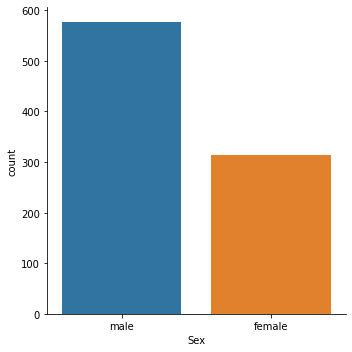

In [8]:
sns.catplot(data=titanic_df, kind="count", x="Sex")
#A lot more males than females

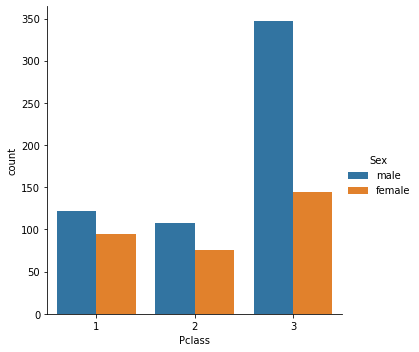

In [9]:
sns.catplot(data=titanic_df, kind="count", hue="Sex", x="Pclass")
# A lot more males in 3rd class than females

In [3]:
#Separate male females and children
def male_female_child(passenger):
    age,sex = passenger
    
    if age<18:
        return 'child'
    else:
        return sex

In [4]:
#Defining a new column
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child,axis=1)

In [12]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [13]:
titanic_df['person'].value_counts()

male      519
female    259
child     113
Name: person, dtype: int64

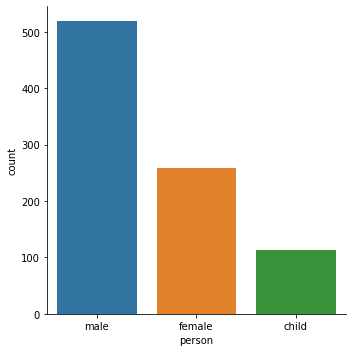

In [14]:
sns.catplot(data=titanic_df, kind='count', x='person')

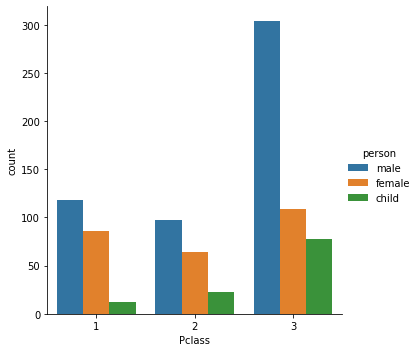

In [15]:
sns.catplot(data=titanic_df,kind='count', x='Pclass', hue='person')

<AxesSubplot:>

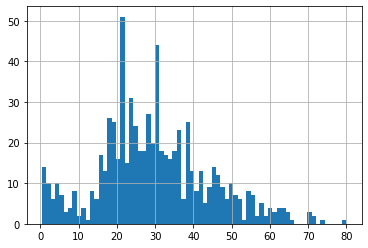

In [16]:
titanic_df['Age'].hist(bins=70)

---
> FacetGrids (below) to show multiple plots on the same figure

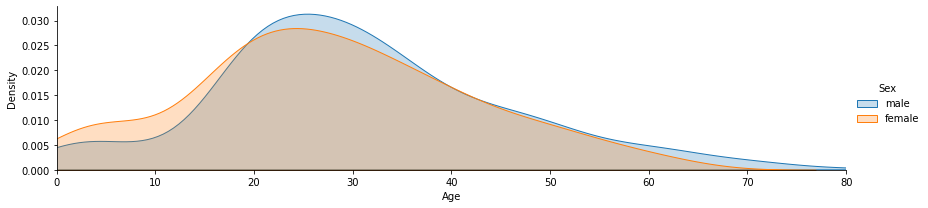

In [17]:
# Facetgrid to use multiple plots on the same figure
# Using Sex as Hue
fig = sns.FacetGrid(titanic_df,hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))

fig.add_legend()

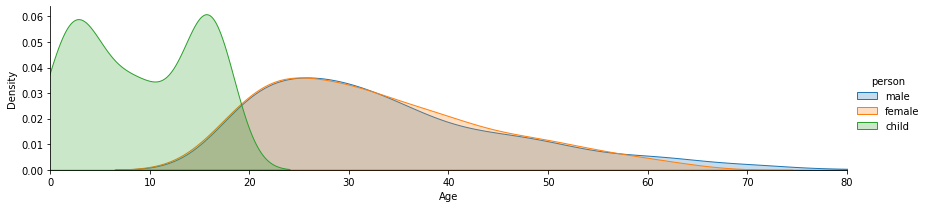

In [18]:
# Facetgrid to use multiple plots on the same figure
# Using person as Hue
fig = sns.FacetGrid(titanic_df,hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))

fig.add_legend()

Q What deck were the passangers on and how does that relate to their class?

In [19]:
# Let's have a look at the df
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [5]:
# Cabin clumn has null values so let's drop them
deck = titanic_df['Cabin'].dropna()

In [6]:
deck.head()


1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


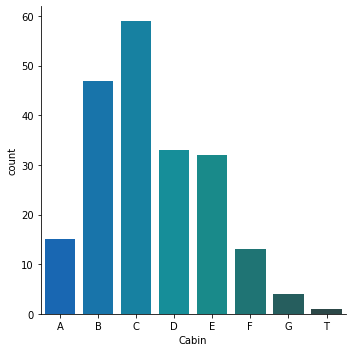

In [14]:
levels = []

for level in deck:
    levels.append(level[0])

levels.sort()
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin',kind='count', data=cabin_df, palette='winter_d')

In [13]:
cabin_df['Cabin']

0      A
1      A
2      A
3      A
4      A
      ..
199    G
200    G
201    G
202    G
203    T
Name: Cabin, Length: 204, dtype: object

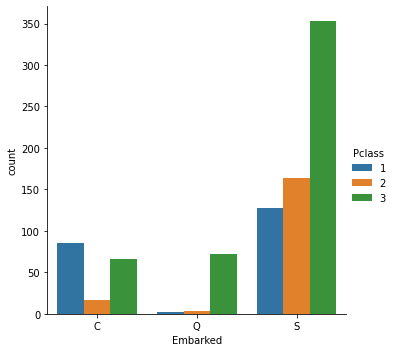

In [24]:
sns.catplot(data=titanic_df, x='Embarked',kind="count", hue='Pclass', order=['C','Q','S'])

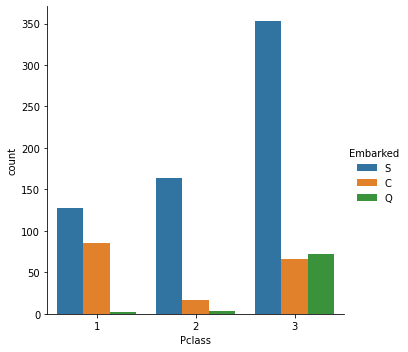

In [25]:
sns.catplot(data=titanic_df, x='Pclass',kind="count", hue='Embarked')

---
Q) Who were alone?

In [26]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


We can see that the SibSp shows us then number of siblings each person had and that Parch shows us the number of parents or children they had.

>If both these columns have 0 for a row than that person was alone

In [9]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [10]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


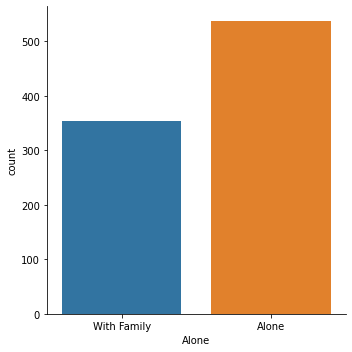

In [30]:
sns.catplot('Alone', data= titanic_df, kind='count')

Q) What factors helped someone survive the sinking?

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


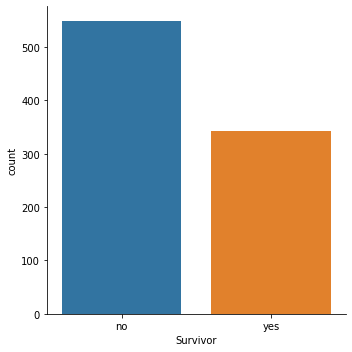

In [12]:
# Defining new column
titanic_df['Survivor'] = titanic_df.Survived.map(
    {0:'no',
     1:'yes'})

sns.catplot('Survivor', data=titanic_df, kind='count')

Most of the people did not survive.

Q) Was class a factor?

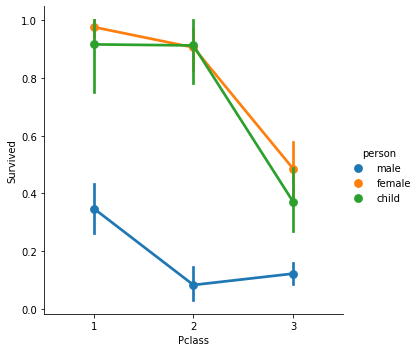

In [45]:
sns.catplot(x='Pclass',y= 'Survived',kind='point',hue='person', data=titanic_df)

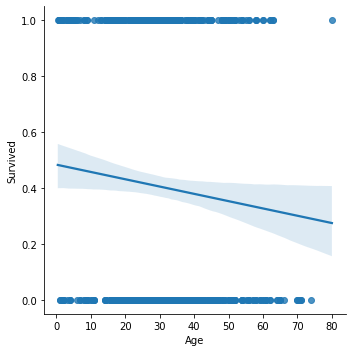

In [50]:
 sns.lmplot(x='Age',y= 'Survived', data=titanic_df)

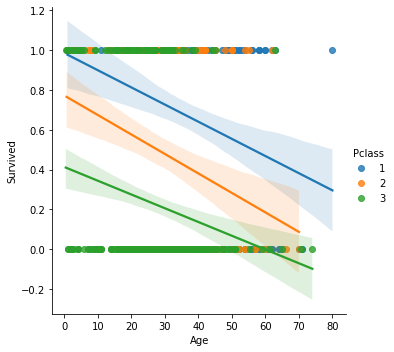

In [51]:
 sns.lmplot(x='Age',y= 'Survived', hue='Pclass', data=titanic_df)

> The above graph shows us that more class 1 passangers survived than class 2 and 3 passangers.
> > This implies that class might have been a factor in survival

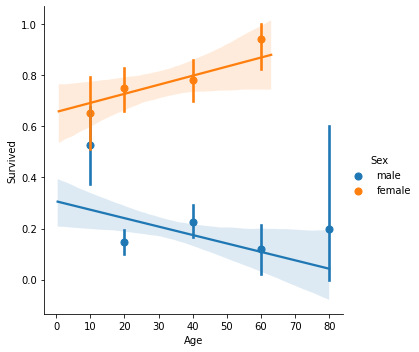

In [16]:
generations = [10, 20, 40, 60, 80]
sns.lmplot(x='Age',y= 'Survived', hue='Sex', data=titanic_df, x_bins=generations)

Interestingly there is a high standard deviation in old, male passangers.

### Women and children were rescued first as shown in story and proved in the graph

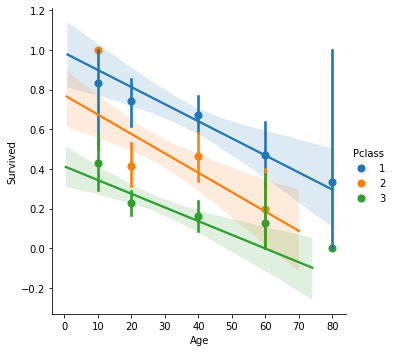

In [17]:
sns.lmplot(x='Age',y= 'Survived', hue='Pclass', data=titanic_df, x_bins=generations)

> Class 1 had the highest survival rates. The older passangers of class 1 have a high standard deviation. These could be the male passangers based on the information in the previous graph